# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [67]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [68]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = pd.DataFrame(data = X_train, columns= columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
1,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
2,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
3,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [69]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

from sklearn.linear_model import LinearRegression
lin_rg = LinearRegression()
lin_rg.fit(X_train, y_train)
pred = lin_rg.predict(X_test)
print(r2_score(pred, y_test))
print(mean_squared_error(pred, y_test) ** 0.5, '\n')

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
print(r2_score(pred, y_test))
print(mean_squared_error(pred, y_test) ** 0.5, '\n')

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
print(r2_score(pred, y_test))
print(mean_squared_error(pred, y_test) ** 0.5, '\n')

0.3523653008788691
5.783509315085134 

0.3511027436346723
5.78733207930106 

0.14400798004973614
6.304209093307778 



---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [70]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from statsmodels.regression.linear_model import OLSResults
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.081    
Dependent Variable:     y                AIC:                         3707.2197
Date:                   2021-10-11 18:36 BIC:                         3759.2381
No. Observations:       404              Log-Likelihood:              -1840.6  
Df Model:               13               F-statistic:                 3.731    
Df Residuals:           391              Prob (F-statistic):          1.24e-05 
R-squared (uncentered): 0.110            Scale:                       548.27   
------------------------------------------------------------------------------------
              Coef.       Std.Err.         t         P>|t|        [0.025      0.975]
------------------------------------------------------------------------------------
x1           -0.9708        1.5596      -0.6225      0.5340      -4.0371      2.0955
x2            1.0571        1.7833       0.5928      0.5537      -2.4489      4.5632
x3            0.0383        2.3175       0.0165      0.9868      -4.5180      4.5946
x4            0.5945        1.1991       0.4958      0.6203      -1.7629      2.9519
x5           -1.8551        2.5360      -0.7315      0.4649      -6.8410      3.1307
x6            2.5732        1.6613       1.5489      0.1222      -0.6929      5.8394
x7           -0.0876        2.1050      -0.0416      0.9668      -4.2261      4.0509
x8           -2.8809        2.3266      -1.2383      0.2164      -7.4552      1.6933
x9            2.1122        3.1759       0.6651      0.5064      -4.1317      8.3562
x10          -1.8753        3.4812      -0.5387      0.5904      -8.7196      4.9689
x11          -2.2928        1.5713      -1.4591      0.1453      -5.3820      0.7965
x12           0.7182        1.3674       0.5252      0.5997      -1.9701      3.4065
x13          -3.5925        2.0692      -1.7362      0.0833      -7.6606      0.4757
-------------------------------------------------------------------------------
Omnibus:                  141.494           Durbin-Watson:              0.073  
Prob(Omnibus):            0.000             Jarque-Bera (JB):           629.882
Skew:                     1.470             Prob(JB):                   0.000  
Kurtosis:                 8.365             Condition No.:              10     
===============================================================================

"""

In [71]:
final = sm.regression.linear_model.OLSResults(model, 
                                              ridge.coef_, 
                                              model.normalized_cov_params)
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.110
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              3.731
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                    1.24e-05
Time:                        18:36:47   Log-Likelihood:                         -1840.6
No. Observations:                 404   AIC:                                      3707.
Df Residuals:                     391   BIC:                                      3759.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9665      1.560     -0.620      0.536      -4.033       2.100
x2             1.0489      1.783      0.588      0.557      -2.457       4.555
x3             0.0247      2.317      0.011      0.991      -4.532       4.581
x4             0.5967      1.199      0.498      0.619      -1.761       2.954
x5            -1.8375      2.536     -0.725      0.469      -6.823       3.148
x6             2.5786      1.661      1.552      0.121      -0.688       5.845
x7            -0.0915      2.105     -0.043      0.965      -4.230       4.047
x8            -2.8645      2.327     -1.231      0.219      -7.439       1.710
x9             2.0736      3.176      0.653      0.514      -4.170       8.317
x10           -1.8400      3.481     -0.529      0.597      -8.684       5.004
x11           -2.2879      1.571     -1.456      0.146      -5.377       0.801
x12            0.7182      1.367      0.525      0.600      -1.970       3.407
x13           -3.5842      2.069     -1.732      0.084      -7.652       0.484
==============================================================================
Omnibus:                      142.324   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.431
Skew:                           1.476   Prob(JB):                    2.33e-139
Kurtosis:                       8.404   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
final = sm.regression.linear_model.OLSResults(model, 
                                              lasso.coef_, 
                                              model.normalized_cov_params)
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.104
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              3.507
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                    3.41e-05
Time:                        18:36:47   Log-Likelihood:                         -1842.0
No. Observations:                 404   AIC:                                      3710.
Df Residuals:                     391   BIC:                                      3762.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2469      1.565     -0.158      0.875      -3.323       2.830
x2                  0      1.789          0      1.000      -3.518       3.518
x3                 -0      2.325         -0      1.000      -4.571       4.571
x4             0.3420      1.203      0.284      0.776      -2.023       2.707
x5                 -0      2.544         -0      1.000      -5.002       5.002
x6             2.8508      1.667      1.710      0.088      -0.426       6.128
x7                 -0      2.112         -0      1.000      -4.152       4.152
x8                 -0      2.334         -0      1.000      -4.589       4.589
x9                 -0      3.186         -0      1.000      -6.265       6.265
x10           -0.2149      3.493     -0.062      0.951      -7.082       6.652
x11           -2.0123      1.577     -1.276      0.203      -5.112       1.087
x12            0.4265      1.372      0.311      0.756      -2.271       3.124
x13           -3.5219      2.076     -1.696      0.091      -7.604       0.560
==============================================================================
Omnibus:                      166.428   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              816.332
Skew:                           1.731   Prob(JB):                    5.44e-178
Kurtosis:                       9.042   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.Обычная линейная регрессия обучилась методом наименьших квадратов буз регуляризации. Практически не наблюдается занулившихся весов. Наибольшую важность модель выделила в признаке LSTAT, если сравнивать по абсолютной величине весов, и наименьшую важность в признаке INDUS. Без регуляризации такая модель может переобучиться и не наказывать за большие веса параметров регрессии. Модель не отбирает никакие признаки. Таким образом на обучающей выборке будет хорошее качество, но плохое на тестовой. Перед обучением признаки были отмасштабированы.

2.При использовании Ridge регрессии можно заметить такую же тенденцию в весах как и при использовании обычной линейной регрессии, но немного видно, что веса были оштрафованы и немного ниже, чем при использовании обычной регрессии, так как веса не так больши по абсолютной величине. Наибольшую важность модель выделила в признаке LSTAT, если сравнивать по абсолютной величине весов, и наименьшую важность в признаке INDUS. Использовалась l1 регуляризация.

3.При использовании Lasso регрессии некоторые веса занулились. Так как мы использовали l2 регуляризацию, модель отобрала наиболее информативные признаки.
К информативным моджно отнести: CRIM, CHAS, RM, TAX, PTRATIO, B, LSTAT. Самый важный из них RM.

---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

In [73]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

```your conclusions here```

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [112]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV
import decimal
ridge = Ridge()
params = {'alpha' : np.arange(10**-4, 10**3, 10**-2)}
BestRidge = GridSearchCV(ridge, params, scoring= 'neg_root_mean_squared_error', cv=5)
BestRidge.fit(X_train, y_train)
print(BestRidge.best_estimator_)

Ridge(alpha=8.2101, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


Данный метод работает достаточно долго, чтобы обучать модели с перебором весов.
Найденный параметр равен alpha=8.2101.

---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [75]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        if w0 is None:
            self.w0 = np.zeros(X.shape[1]+1)
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.h = 0
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.w = self.w0
        X = np.c_[ X, np.ones(X.shape[0]) ]

        w_new = self.w
        self.loss_history = []
        for i in range(self.max_iter):
          grad = self.calc_gradient(X, y)
          
          if(self.gd_type == 'GradientDescent' or self.gd_type == 'StochasticDescent'):
            w_new = self.w - self.eta * grad
          else:
            self.h = self.alpha * self.h + self.eta * grad
            w_new = self.w - self.h

          self.loss_history.append(self.calc_loss(X, y))
          if(np.linalg.norm(w_new - self.w) < self.tolerance):
            break
          else:
            self.w = w_new

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        if(X.shape[1] != len(self.w)):
          X = np.c_[ X, np.ones(X.shape[0]) ]
        return np.dot(X, self.w)
        
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        if(self.gd_type == 'GradientDescent'):
          return 2 * np.dot(np.transpose(X), (np.dot(X, self.w) - y)) / X.shape[0]

        if(self.gd_type == 'StochasticDescent'):
          batch_ind = np.random.choice(X.shape[0], round(self.delta * X.shape[0]), replace=False)
          X_batch = X[batch_ind]
          y_batch = y[batch_ind]
          return 2 * np.dot(np.transpose(X_batch), (np.dot(X_batch, self.w) - y_batch)) / X_batch.shape[0]

        if(self.gd_type == 'Momentum'):
          batch_ind = np.random.choice(X.shape[0], round(self.delta * X.shape[0]), replace=False)
          X_batch = X[batch_ind]
          y_batch = y[batch_ind]
          return 2 * np.dot(np.transpose(X_batch), (np.dot(X_batch, self.w) - y_batch)) / X_batch.shape[0]


    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return np.sum((self.predict(X) - y)  ** 2) / X.shape[0]

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [81]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
a = []
for i in range(1000):
  my_reg = LinReg(max_iter = 1000 + i, gd_type='GradientDescent')
  my_reg.fit(X_train, y_train)
  a.append(mean_squared_error(my_reg.predict(X_test), y_test) ** 0.5)

print('The least on "hand-written" model RMSE:', np.min(a))

sklearn_reg = LinearRegression()
sklearn_reg.fit(X_train, y_train)
print('The least on sklearn model RMSE:', mean_squared_error(sklearn_reg.predict(X_test), y_test) ** 0.5)
print('The least on stats model RMSE is simililar to sklearn')

The least on "hand-written" model MSE: 5.791882477220084
The least on sklearn model MSE: 5.783509315085134
The least on stats model MSE is simililar to sklearn


The best MSE on hand-written model: 5.791882477220084
Iteration with best MSE on hand-written model: 1999
The best MSE on hand-written Momentum model: 5.783737963384184
The best alpha on hand-written Momentum model: 0.9


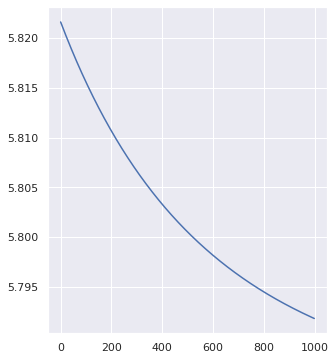

In [82]:
print("The best RMSE on hand-written model:", np.min(a))
print("Iteration with best MSE on hand-written model:", range(1000)[np.argmin(a)] + 1000)
plt.figure(figsize=(5, 6))
plt.plot(a)

a = []
for i in np.arange(0.1, 1.1, 0.1):
  my_reg = LinReg(alpha = i)
  my_reg.fit(X_train, y_train)
  a.append(mean_squared_error(my_reg.predict(X_test), y_test) ** 0.5)

print("The best RMSE on hand-written Momentum model:", np.min(a))
print("The best alpha on hand-written Momentum model:", np.arange(0.1, 1, 0.1)[np.argmin(a)])

Для приведенных моделей Sklearn и StatsModels показали более хорошее качество, однако hand written модель при большем количество итераций могла бы показывать примерно такое же качество. Как описано на графике выше, ошибка с числом итераций снижалась.
Количество итераций в градиентном спуске снижает ошибку до того момента пока мы не попадаем в малую окрестность минимума нашей функции потерь. Далее из-за константного шага модель либо попадает в минимум, либо "кружит" в этой окрестности. Так получается, что мало итераций оставляет большую ошибку, большое приводит к бесполезному вычислению градиентов при константном шаге.
Коэфициент альфа при Momentum реализации( на сколько я понял, ведь этот параметр так называется в реализации) то при низком значении модель не получает никакого выигрыша в ошибке, при слошком большом происходит переполнение.
Как и ожидалось библиотечные модели показывают лучшее качество, однако написанная отстает по качеству на одну сотую по MSE, что говорит о ее качестве.

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

MSE on 1500 iteration 5.821578365471962


Text(0, 0.5, 'loss')

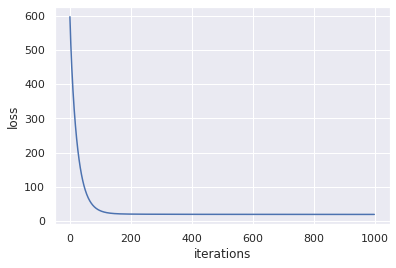

In [93]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
my_reg = LinReg(max_iter = 1500, gd_type='GradientDescent')
my_reg.fit(X_train, y_train)
print('MSE on 1500 iteration', mean_squared_error(my_reg.predict(X_test), y_test)**0.5)

fig, ax = plt.subplots()
ax.plot(my_reg.loss_history)
ax.set_xlabel('iterations')
ax.set_ylabel('loss')

MSE on 1500 iteration 5.8258321129036075


Text(0, 0.5, 'loss')

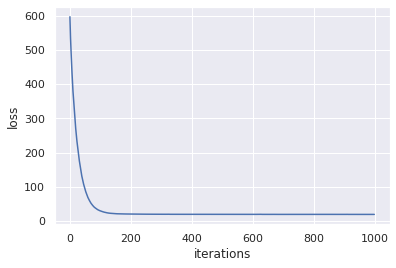

In [104]:
my_reg = LinReg(max_iter = 1500, gd_type='StochasticDescent', delta=0.15)
my_reg.fit(X_train, y_train)
print('MSE on 1500 iteration', mean_squared_error(my_reg.predict(X_test), y_test)**0.5)

fig, ax = plt.subplots()
ax.plot(my_reg.loss_history)
ax.set_xlabel('iterations')
ax.set_ylabel('loss')

MSE on 1500 iteration 5.75158503536169


Text(0, 0.5, 'loss')

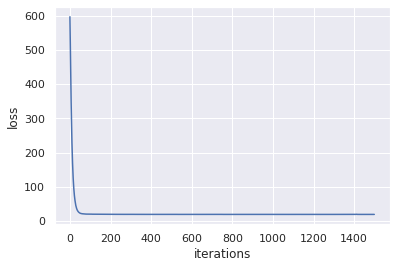

In [111]:
my_reg = LinReg(max_iter = 1500, gd_type='Momentum', delta=0.3, alpha = 0.6)
my_reg.fit(X_train, y_train)
print('MSE on 1500 iteration', mean_squared_error(my_reg.predict(X_test), y_test)**0.5)

fig, ax = plt.subplots()
ax.plot(my_reg.loss_history)
ax.set_xlabel('iterations')
ax.set_ylabel('loss')

Обычная линейная регрессия с градиентным спуском показывает один стабильный результат потерь. При этом стохастический градиентный спуск и моментум чувствительны к случайности, так как там формируется случайный батч для вычисления на нем градиента. 
От случайности зависит и само обучение двух последних методов, так как в батч может не попасть аномальные объекты или выбросы, тогда обучение произойдет лучше, чем при полном вычислении всех градиентов.
При формировании батчей модель лучше понимает тенденцию всей выборки и это намного экономит вычисления. Однако такие модели не стабильны и привязаны к случайности.